In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

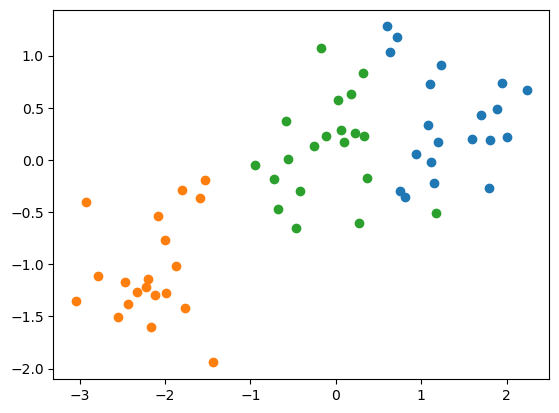

In [2]:
# データ生成の中心点
center = [
    [1.5, 0.5],
    [-2.0, -1.0],
    [0, 0]
]

# 各中心点から生成する点の数
DSIZE = 20

# データの生成
data = [c + (np.random.randn(DSIZE, 2) / 2) for c in center]
data = np.concatenate(data)

# 生成された元の点ごとのラベル
label = np.arange(3 * DSIZE) // DSIZE


# 表示
for i in range(3):
    plt.scatter(data[:, 0][label==i], data[:, 1][label==i])

In [3]:
## 線形回帰の例
# 点データを(x, y)に分割 => (予測モデルへの入力値, 予測したい値)
X, y = np.split(data, 2, axis=1)

# 予測モデルの作成、適当なx座標の入力し、y座標の値を予測
lr = LinearRegression().fit(X, y)
test_X = np.arange(-4, 5)
test_X = test_X.reshape(len(test_X), 1)
y_predict = lr.predict(test_X)

# 予測結果の表示
print(y_predict)

[[-1.61461537]
 [-1.23037404]
 [-0.84613272]
 [-0.46189139]
 [-0.07765006]
 [ 0.30659126]
 [ 0.69083259]
 [ 1.07507391]
 [ 1.45931524]]


In [4]:
# 今回の予測モデルの式
y_predict_function = lambda x: x * lr.coef_ + lr.intercept_
print(y_predict_function(3))

[[1.07507391]]


In [5]:
## 分類の例
# K-nearest Neighbor（KNN）の予測モデルを作成
# data(x, y)とそれに対応するlabel(点が属するクラスを表す)のペアを入力し、KNN予測モデルを作成
neigh = KNeighborsClassifier().fit(data, label)

In [6]:
# 適当な点のx, y座標を入力して、そのてんが　属するクラスを予測
test_Xy = np.array([np.random.rand(10) * 6 - 3, np.random.rand(10) * 4 - 2]).T
predict_label = neigh.predict(test_Xy)

C:\Users\bayst\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [7]:
print(predict_label)

[1 2 0 2 1 1 0 2 0 0]


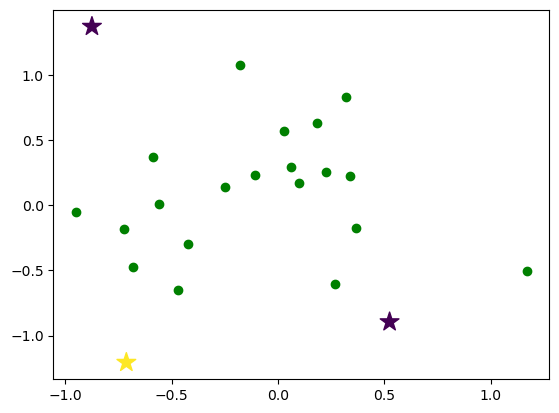

In [8]:
for i in range(3):
    rgb = [False for i in range(3)]
    rgb[i] = True
plt.scatter(data[:,0][label==i],data[:,1][label==i], c=[[0.0, 0.5, 0.0]])
plt.scatter(test_Xy[:,0][predict_label==i], test_Xy[:,1][predict_label==i],c=rgb, marker="*", s=200)